In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl

import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


# Tarea 3: Encuentre la regresión

Ud recibe unos datos $x$ y $y$ cómo se muestran a continuación. Ud debe responder cuatro preguntas a partir de estos datos. Suponga que ud tiene un modelo tal que $y=f(x)$ más aún desconoce $f$.

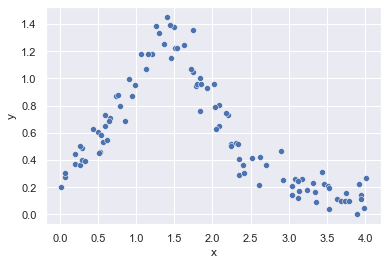

,x,y
0,0.065859,0.277413
1,0.020931,0.202239
2,0.070312,0.307369
3,0.206166,0.367530
4,0.286572,0.491144
...,...,...
95,3.922613,0.225565
96,3.898473,0.000000
97,3.952111,0.141005
98,3.939211,0.115500


In [2]:
df = pd.read_pickle('ex1.gz')
sns.scatterplot(x='x',y='y',data=df)
plt.show()
df


## (A) Pendiente e intercepto
Determine la pendiente de los datos en el intervalo $[0,1.5]$ y el valor del intercepto con el eje $y$. Es decir, $f(0)=?$. ¿Cuál es el valor de $r^2$?

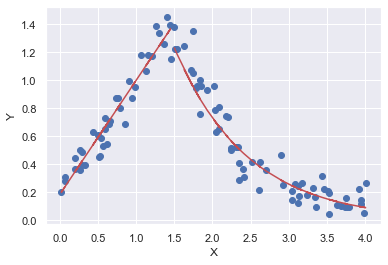

De 0 a 1.5, el valor de la pendiente es:  [0.81638696]
El valor del intercepto, es decir f(0) es:  [0.18270691]
El valor de r^2 es:  [0.93164163]


In [3]:
x = df["x"].to_numpy().reshape(-1,1)
y = df["y"].to_numpy().reshape(-1,1)


lx = []
ly = []
lx2 = []
ly2 = []
e_y = []
for i in range(len(x)):
    if x[i]<=1.5 :
        lx.append(x[i])
        ly.append(y[i])
    else:
        if y[i]!=0:
            lx2.append(x[i])
            ly2.append(y[i])
            e_y.append(np.log(y[i]))
        
        
x_a = np.array(lx).reshape(-1,1)
y_a = np.array(ly).reshape(-1,1)
x_b = np.array(lx2).reshape(-1,1)
y_b = np.array(ly2).reshape(-1,1)
f_x = np.array(e_y).reshape(-1,1)
        




P = np.array([np.ones([len(x_a), 1]) , x_a]).reshape(2,len(x_a)).T
coeffs = np.linalg.inv(P.T @ P) @ P.T @ y_a
b, m = coeffs
f_ajuste = b + m*x_a



P2 = np.array([np.ones([len(x_b), 1]) , x_b]).reshape(2,len(x_b)).T
coeffs2 = np.linalg.inv(P2.T @ P2) @ P2.T @ f_x
b2, m2 = coeffs2
f_ajuste_lineal2 = b2 + m2*x_b
f_ajuste2 = np.exp(b2 + m2*x_b)



plt.plot(x_a, y_a, 'bo')
plt.plot(x_a,f_ajuste,'r')
plt.plot(x_b, y_b, 'bo')
plt.plot(x_b,f_ajuste2,'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



div = len(x_a)
s_x = sum(x_a)
s_y = sum(y_a)
s_xy = sum(x_a*y_a)
s_xcu = sum(x_a*x_a)
s_ycu = sum(y_a*y_a)
prom_x = s_x/div
prom_y = s_y/div

sigma_x = np.sqrt((s_xcu/div) - prom_x*prom_x)
sigma_y = np.sqrt(s_ycu/div - prom_y*prom_y)

cov = (s_xy/div) - (prom_x*prom_y)
rr = (cov/(sigma_x*sigma_y))*(cov/(sigma_x*sigma_y))





print('De 0 a 1.5, el valor de la pendiente es: ', m)
print('El valor del intercepto, es decir f(0) es: ', b)
print('El valor de r^2 es: ', rr)




















## (B) Regresión polinomial
Suponga que quiere realizar la siguiente regresión polinomial,
$$y=\beta_1+\beta_2x+\beta_2x^2+\beta_2x^3+\beta_2x^4+\beta_2x^5.$$
Plantee la función de costo que le permita calcular los coeficientes y calcule $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. ¿Cuál es el $r^2$?

Calcule $f(0)$ y compare con los resultados anteriores




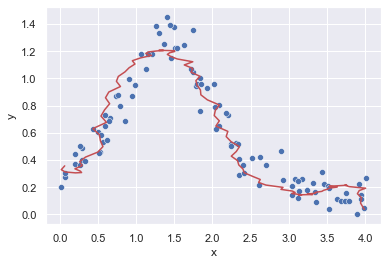

Beta_1:  -0.8426133380451586
Beta_2:  3.784803310463362
Beta_3:  -3.0033972542455256
Beta_4:  0.8584473843876271
Beta_5:  -0.08305842052867478


Valor de costo:  0.012550627043982363
El valor de r^2 es:  0.911107849239315 . El valor de r^2 es bastante cercano a 1, por lo que la función dada presenta un buen ajuste
Valor de F(0):  0.35735943217343996


In [4]:

x = df["x"]
y = df["y"]

x_a = np.array(lx)
y_a = np.array(ly)


lista = []
for i in range(len(x)):
    lista.append([1, x[i], x[i]*x[i], x[i]*x[i]*x[i], x[i]*x[i]*x[i]*x[i], x[i]*x[i]*x[i]*x[i]*x[i]])

    
Mbg = np.matrix(lista)
b = np.array([y]).reshape(-1,1)
Mb = np.matrix(b)


def L_cost(k ,Mbg ,Mb):
    
    m,n = Mbg.shape
    X = np.matrix(k).T
    DeltaB=(Mbg*X - Mb) 
    return (DeltaB.T*DeltaB)[0,0]/m 
 

ah1 = sp.optimize.minimize(fun=L_cost,x0=np.zeros(Mbg.shape[1]), args = (Mbg,Mb), tol=1e-10)
ah1['x']


cons =  np.linspace(0,4,100)

def Polinomio(a_5,a_4,a_3,a_2,a_1,a_0,var):
    return  a_0 +  a_1*var +a_2*var*var + a_3*var*var*var+ a_4*var*var*var*var + a_5*var*var*var*var*var 


f = Polinomio(ah1['x'][5],ah1['x'][4],ah1['x'][3],ah1['x'][2],ah1['x'][1],ah1['x'][0],cons)
rr = 1-np.sum((f - y)**2)/np.sum((y-y.mean())**2)


sns.scatterplot(x ='x', y ='y',data=df)
plt.plot(x,f,"-", color='r')
plt.show()

print('Beta_1: ',ah1['x'][1])
print('Beta_2: ',ah1['x'][2])
print('Beta_3: ',ah1['x'][3])
print('Beta_4: ',ah1['x'][4])
print('Beta_5: ',ah1['x'][5])

print()
print()
print('Valor de costo: ',L_cost(ah1['x'],Mbg,Mb))
print('El valor de r^2 es: ',rr, '. El valor de r^2 es bastante cercano a 1, por lo que la función dada presenta un buen ajuste') 
print('Valor de F(0): ',f[0])






## (C) Regresión polinomial exacta
Resulta, que cuando se quiere hacer alguna regresión polinomial esta se puede hacer de forma exacta. ¿Cómo? Suponga que ud va a considerar que su problema en lugar de tener $1$ variable ($x$) tiene $n+1$, siendo $n$ el orden del polinomio a ajustar. Es decir, sus nuevas variables van a ser $\{x_0,\,x_1,\,x_2,\,x_3,\dots,\,x_n\}$ definiendo $x_j=x^j$. Así pues, siguiendo el mismo procedimiento para la regresión lineal multidimensional que realizamos para el ejercicio de datos inmobiliarios, puede encontrar los valores de los coeficientes $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. Encuentre estos valores y compare con los resultados en la sección **(B)**.

Calcule $f(0)$ y compare con los resultados anteriores.

> Si ud se pregunta si esto es posible la respuesta es sí. Inclusive, esto se puede extender a cualquier a cualquier conjunto de funciones, tal que $x_j=f_j(x)$, que represente un conjunto "linealmente independiente" (¡Me estoy adelantando a *Fourier*!). Para quienes quieran explorar algunas curiosidades matemáticas, cuando $n+1$ es igual al número de puntos o valores de $x$ (y todos diferentes) la matriz es siempre invertible y resulta ser la inversa de una matriz de Vandermonde.

In [5]:
Y = df.loc[:, ['y']]

Y


,y
0,0.277413
1,0.202239
2,0.307369
3,0.367530
4,0.491144
...,...
95,0.225565
96,0.000000
97,0.141005
98,0.115500


In [6]:

y, type(y), Y, type(Y)

(0     0.277413
 1     0.202239
 2     0.307369
 3     0.367530
 4     0.491144
         ...   
 95    0.225565
 96    0.000000
 97    0.141005
 98    0.115500
 99    0.048689
 Name: y, Length: 100, dtype: float64,
 pandas.core.series.Series,
            y
 0   0.277413
 1   0.202239
 2   0.307369
 3   0.367530
 4   0.491144
 ..       ...
 95  0.225565
 96  0.000000
 97  0.141005
 98  0.115500
 99  0.048689
 
 [100 rows x 1 columns],
 pandas.core.frame.DataFrame)

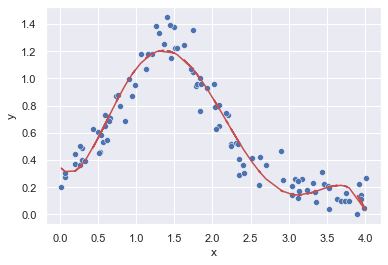

Beta_1:  -0.835882684712755
Beta_2:  3.7727640058019665
Beta_3:  -2.995260116328245
Beta_4:  0.8561470487105401
Beta_5:  -0.08282854279139971
F(0):  0.3564466848234892


In [7]:
x = df["x"]
y = df["y"]


arreglo_x = np.array(x).reshape(-1, 1)
arreglo_y = np.array(y).reshape(-1, 1)

P3 = np.array([np.ones([len(x), 1]), arreglo_x, arreglo_x**2, arreglo_x**3, arreglo_x**4, arreglo_x**5]).reshape(6, len(x)).T
coeffs = np.linalg.inv(P3.T @ P3) @ P3.T @ arreglo_y
a0, a1, a2, a3, a4, a5 = coeffs
f_ajuste3 = a0 + (a1*arreglo_x) + (a2*arreglo_x*arreglo_x) + (a3*arreglo_x*arreglo_x*arreglo_x) +  (a4*arreglo_x*arreglo_x*arreglo_x*arreglo_x) + (a5*arreglo_x*arreglo_x*arreglo_x*arreglo_x*arreglo_x)     


plt.figure()
sns.scatterplot(x='x',y='y',data = df)
plt.plot(arreglo_x, f_ajuste3, c ='r')
plt.ylabel('y')
plt.xlabel('x')
plt.show()


print('Beta_1: ',coeffs.tolist()[1][0])
print('Beta_2: ',coeffs.tolist()[2][0])
print('Beta_3: ',coeffs.tolist()[3][0])
print('Beta_4: ',coeffs.tolist()[4][0])
print('Beta_5: ',coeffs.tolist()[5][0])
print('F(0): ',coeffs.tolist()[0][0])

In [8]:
X = df.loc[:, ['x']].rename(columns={'x': 'x1'})
X.insert(0, 'x0', 1)
X['x2'] = X['x1']*X['x1']

X

,x0,x1,x2
0,1,0.065859,0.004337
1,1,0.020931,0.000438
2,1,0.070312,0.004944
3,1,0.206166,0.042504
4,1,0.286572,0.082123
...,...,...,...
95,1,3.922613,15.386893
96,1,3.898473,15.198094
97,1,3.952111,15.619183
98,1,3.939211,15.517382


In [9]:
x, type(x), X, type(X)

(0     0.065859
 1     0.020931
 2     0.070312
 3     0.206166
 4     0.286572
         ...   
 95    3.922613
 96    3.898473
 97    3.952111
 98    3.939211
 99    3.987120
 Name: x, Length: 100, dtype: float64,
 pandas.core.series.Series,
     x0        x1         x2
 0    1  0.065859   0.004337
 1    1  0.020931   0.000438
 2    1  0.070312   0.004944
 3    1  0.206166   0.042504
 4    1  0.286572   0.082123
 ..  ..       ...        ...
 95   1  3.922613  15.386893
 96   1  3.898473  15.198094
 97   1  3.952111  15.619183
 98   1  3.939211  15.517382
 99   1  3.987120  15.897126
 
 [100 rows x 3 columns],
 pandas.core.frame.DataFrame)

## (D) Regresión a un modelo teórico

Suponga que su modelo teórico es el siguiente:
$$y=\frac{a}{\left[(x-b)^2+c\right]^\gamma}.$$
Halle $a$, $b$, $c$ y $\gamma$.

Calcule $f(0)$ y compare con los resultados anteriores

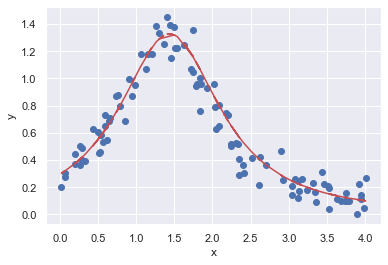

a:  0.9443200310808859
b:  1.4387380962623384
c:  0.7383286076756036
gama:  1.1262871699033796
Finalmente, F(0) es:  0.29515065598006324 , con buena aproximacion a los valores anteriormente reportados


In [10]:
x = df["x"]
y = df["y"]


lx = []
ly = []
for i in range(len(x)):
    if x[i]<=1.5 :
        lx.append(x[i])
        ly.append(y[i])
        
        
x_a = np.array(lx)
y_a = np.array(ly)

def f(vec,x_a): 
    return (vec[0])/((x_a-vec[1])**2 + vec[2])**vec[3]

def L_ajuste(vec,x_a,y_a): 
    deltaY=f(vec,x_a) - y_a
    return np.dot(deltaY,deltaY)/len(y_a)


res2 = sp.optimize.minimize(fun=L_ajuste, x0=np.array([0,1,0,0]), args = (x_a,y_a), method='L-BFGS-B', tol=1e-8)
b = f(res2.x,0)


plt.figure()
plt.scatter(x,y, label = "Datos")
plt.plot(x,f(res2.x,x), c = 'r', label = "Ajuste")
plt.xlabel('x')
plt.ylabel('y')
plt.show()


print('a: ',res2["x"][0])
print('b: ', res2["x"][1])
print('c: ',res2["x"][2])
print('gama: ',res2["x"][3])

print('Finalmente, F(0) es: ',b, ', con buena aproximacion a los valores anteriormente reportados')




